<a href="https://colab.research.google.com/github/ShudufhadzoRamuada/Data-Science-02/blob/main/Factors_Influencing_Survival_on_the_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying Factors Influencing Survival on the Titanic


**Import relevant packages**

In [50]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
file_path1 = ('/content/drive/MyDrive/gender_submission.csv')
file_path2 = ('/content/drive/MyDrive/train.csv')

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)


In [30]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
print(df1['PassengerId'].nunique(), df2['PassengerId'].nunique())

common_passenger_ids = set(df1['PassengerId']).intersection(set(df2['PassengerId']))
print(f"Common PassengerIds: {len(common_passenger_ids)}")


418 891
Common PassengerIds: 0


In [32]:
print(df1['PassengerId'].dtype, df2['PassengerId'].dtype)

df1['PassengerId'] = df1['PassengerId'].astype(str)
df2['PassengerId'] = df2['PassengerId'].astype(str)


int64 int64


In [33]:
print(df1['PassengerId'].dtype, df2['PassengerId'].dtype)

df1['PassengerId'] = df1['PassengerId'].astype(str)
df2['PassengerId'] = df2['PassengerId'].astype(str)


object object


In [34]:
merged_inner = pd.merge(df1, df2, on='PassengerId', how='inner')
print(merged_inner.head())


Empty DataFrame
Columns: [PassengerId, Survived_x, Survived_y, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [35]:
only_in_df1 = df1[~df1['PassengerId'].isin(df2['PassengerId'])]
print(only_in_df1.head())

only_in_df2 = df2[~df2['PassengerId'].isin(df1['PassengerId'])]
print(only_in_df2.head())


  PassengerId  Survived
0         892         0
1         893         1
2         894         0
3         895         0
4         896         1
  PassengerId  Survived  Pclass  \
0           1         0       3   
1           2         1       1   
2           3         1       3   
3           4         1       1   
4           5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101

In [36]:
merged_outer = pd.merge(df1, df2, on='PassengerId', how='outer')
print(merged_outer.head())


  PassengerId  Survived_x  Survived_y  Pclass  \
0           1         NaN         0.0     3.0   
1          10         NaN         1.0     2.0   
2         100         NaN         0.0     2.0   
3        1000         0.0         NaN     NaN   
4        1001         0.0         NaN     NaN   

                                  Name     Sex   Age  SibSp  Parch     Ticket  \
0              Braund, Mr. Owen Harris    male  22.0    1.0    0.0  A/5 21171   
1  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0    1.0    0.0     237736   
2                    Kantor, Mr. Sinai    male  34.0    1.0    0.0     244367   
3                                  NaN     NaN   NaN    NaN    NaN        NaN   
4                                  NaN     NaN   NaN    NaN    NaN        NaN   

      Fare Cabin Embarked  
0   7.2500   NaN        S  
1  30.0708   NaN        C  
2  26.0000   NaN        S  
3      NaN   NaN      NaN  
4      NaN   NaN      NaN  


In [37]:
merged_outer

,PassengerId,Survived_x,Survived_y,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NaN,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,10,NaN,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,NaN,C
2,100,NaN,0.0,2.0,"Kantor, Mr. Sinai",male,34.0,1.0,0.0,244367,26.0000,NaN,S
3,1000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,995,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,996,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,997,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,998,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Understandong the dataset**

From this, we get that the variables are passengerID and Survived. Survived is categorial and opassengerID is numerical. There is no null values in either columns


**Data Cleaning**

In [38]:
merged_outer.isnull().sum()


,0
PassengerId,0
Survived_x,891
Survived_y,418
Pclass,418
Name,418
Sex,418
Age,595
SibSp,418
Parch,418
Ticket,418


In [47]:
merged_outer.drop(columns=['Survived_x'], inplace=True)


In [48]:
missing_data = merged_outer.isnull().sum()
print(missing_data)


PassengerId       0
Survived_y      418
Pclass          418
Name            418
Sex             418
Age             595
SibSp           418
Parch           418
Ticket          418
Fare            418
Cabin          1105
Embarked        420
Age Group       595
dtype: int64


In [56]:
merged_cleaned = merged_outer.dropna(how='any')

merged_cleaned


,PassengerId,Survived_y,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
35,103,0.0,1.0,"White, Mr. Richard Frasar",male,21.0,0.0,1.0,35281,77.2875,D26,S,Middle-Aged
112,11,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S,Adult
124,111,0.0,1.0,"Porter, Mr. Walter Chamberlain",male,47.0,0.0,0.0,110465,52.0000,C110,S,Middle-Aged
212,119,0.0,1.0,"Baxter, Mr. Quigg Edmond",male,24.0,0.0,1.0,PC 17558,247.5208,B58 B60,C,Adult
268,124,1.0,2.0,"Webber, Miss. Susan",female,32.5,0.0,0.0,27267,13.0000,E101,S,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,586,1.0,1.0,"Taussig, Miss. Ruth",female,18.0,0.0,2.0,110413,79.6500,E68,S,Child
852,588,1.0,1.0,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1.0,1.0,13567,79.2000,B41,C,Child
857,592,1.0,1.0,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1.0,0.0,36947,78.2667,D20,C,Middle-Aged
867,600,1.0,1.0,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1.0,0.0,PC 17485,56.9292,A20,C,Adult


**Exploratory Data Analysis**

<Axes: title={'center': 'Survival Rate by Gender'}, xlabel='Sex'>

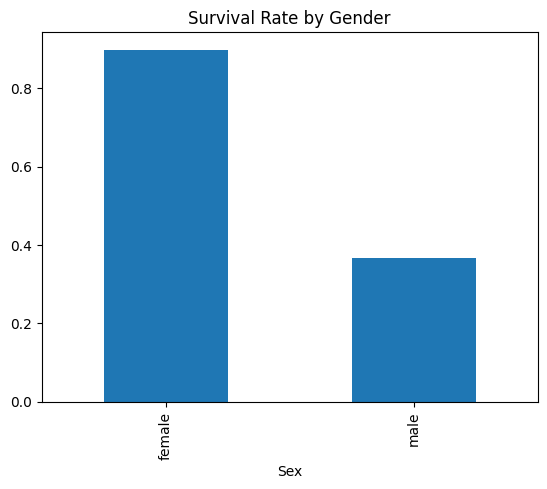

In [57]:
merged_cleaned.groupby('Sex')['Survived_y'].mean().plot(kind='bar', title='Survival Rate by Gender')


<Axes: title={'center': 'Survival Rate by Class'}, xlabel='Pclass'>

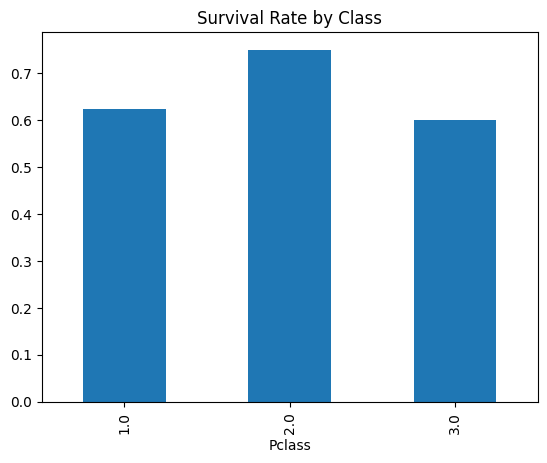

In [58]:
merged_cleaned.groupby('Pclass')['Survived_y'].mean().plot(kind='bar', title='Survival Rate by Class')


<ipython-input-59-042d254ee59e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned['Age Group'] = pd.cut(df['Age'], bins=[0, 12, 20, 35, 60, np.inf], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
<ipython-input-59-042d254ee59e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_cleaned.groupby('Age Group')['Survived_y'].mean().plot(kind='bar', title='Survival Rate by Age Group')


<Axes: title={'center': 'Survival Rate by Age Group'}, xlabel='Age Group'>

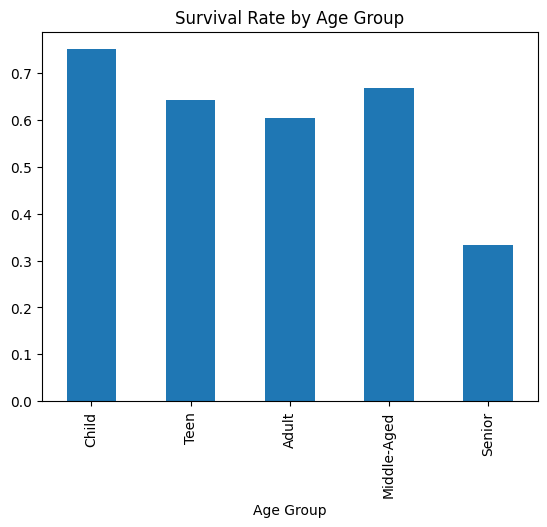

In [59]:
merged_cleaned['Age Group'] = pd.cut(df['Age'], bins=[0, 12, 20, 35, 60, np.inf], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
merged_cleaned.groupby('Age Group')['Survived_y'].mean().plot(kind='bar', title='Survival Rate by Age Group')


**Bivarite Analysis**

<Axes: xlabel='Survived_y', ylabel='Fare'>

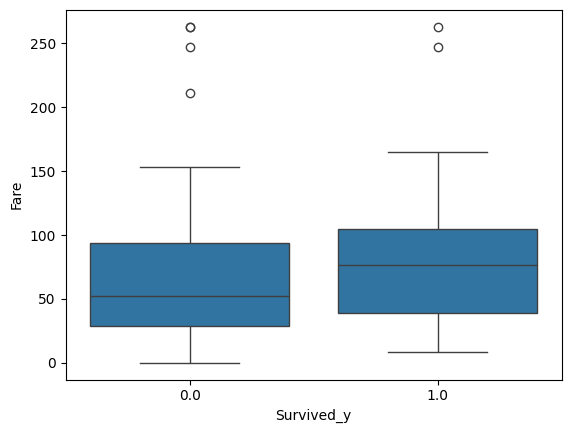

In [62]:
import seaborn as sns
sns.boxplot(x='Survived_y', y='Fare', data=merged_cleaned)


<Axes: title={'center': 'Survival Rate by Embarkation Point'}, xlabel='Embarked'>

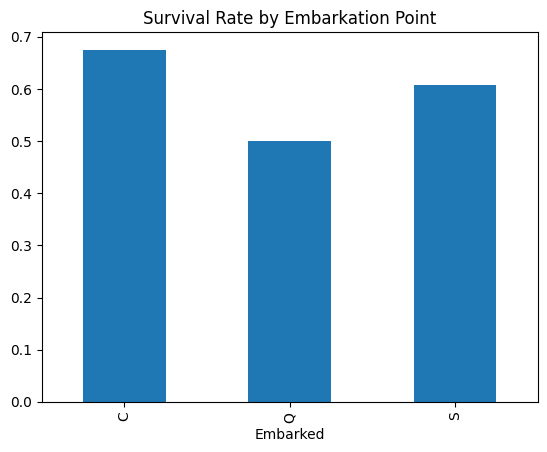

In [63]:
merged_cleaned.groupby('Embarked')['Survived_y'].mean().plot(kind='bar', title='Survival Rate by Embarkation Point')


**Correlational Analysis**

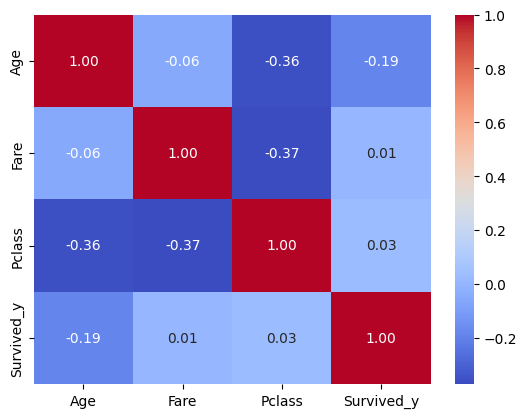

In [64]:
corr = merged_cleaned[['Age', 'Fare', 'Pclass', 'Survived_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
